# Cameron Roehlk
# ABE 516X - Support Vector Machines

This notebook can be found on GitHub under isu-abe/516x/croehlk named Roehlk-SVM-Assignment.ipynb

For this assignment I have chosen option 1 on In-Depth: Support Vector Machines

The task is to explore Support Vector Machines and implement the tutorial into my own notebook

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

Create a data set with two blobs of data points which represent different classes. For my example I picked 100 samples that are split into two groups.

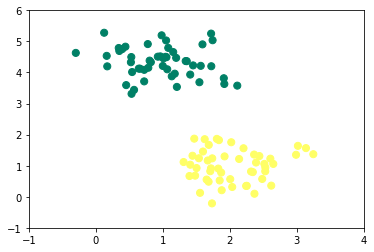

In [8]:
from sklearn.datasets.samples_generator import make_blobs
x, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.50)
plt.scatter(x[:,0],x[:,1], c=y, s=50, cmap='summer')
plt.xlim(-1,4)
plt.ylim(-1,6)
plt.show()

Next is to seperate the two groups of data. By creating a model of classification, I am able to seperate the two groups of data in more than one way. In this case, the lines that differentiate the two groups are very different from each other. Such as one line having a negative slope while the other two are positive. This is not the best way to draw a line between classes. 

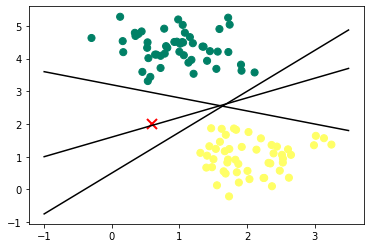

In [9]:
xfit = np.linspace(-1,3.5)
plt.scatter(x[:,0],x[:,1], c=y, s=50, cmap='summer')
plt.plot([0.6],[2], 'x', color = 'red', markeredgewidth=2, markersize=10)

#create lines that seperate the
for m, b in [(1.25,0.5), (0.6,1.6), (-0.4,3.2)]:
    plt.plot(xfit, m*xfit+b,'-k')

plt.show()

## Maximizing the Margin
One way I am able to improve my analysis is through maximizing the margin of of my support vector machines by increasing the width of my lines until they are almost touching the nearest point. The thicker the line, the more optimal the best fit line is to represent the model. In this case it would be the middle line. Support vector machines can also be classified as a maximum margin estimator. The trouble with this method is I have to take time to manually come up with the lines to seperate the two groups of data.

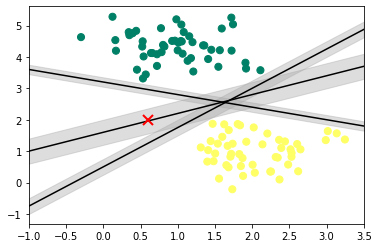

In [10]:
xfit = np.linspace(-1, 3.5)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='summer')

for m, b, d in [(1.25, 0.5, 0.25), (0.6, 1.6, 0.4), (-0.4, 3.2, 0.15)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)
plt.plot([0.6],[2], 'x', color = 'red', markeredgewidth=2, markersize=10)
plt.xlim(-1, 3.5);

## Fitting a support vector machine
I can now use Scitit-learn support vector classifier to fit my data and create a model. Then I can make a plot to visualize my support vector machine.

In [11]:
from sklearn.svm import SVC 
# SVC is "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(x, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [12]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

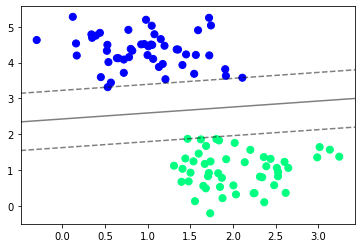

In [13]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(model);

The result is the dividing line maximizes the distance between the two groups of data. This method required a bit more code than the previous example, but reduced my time for figuring out the optimal equation for the best fit line. The points that touch the dashed lines are known as support vectors. These values can be shown below.

In [14]:
model.support_vectors_

array([[0.5323772 , 3.31338909],
       [2.11114739, 3.57660449],
       [1.46870582, 1.86947425]])

Only the location of the suppor vectors is what matters when determining the optimal line of best fit. Any other points that do not fall on the margin, have no influence on fitting the model. This can be shown by having a sample size of 75 and 150. The lines only result on the location of the support vectors.

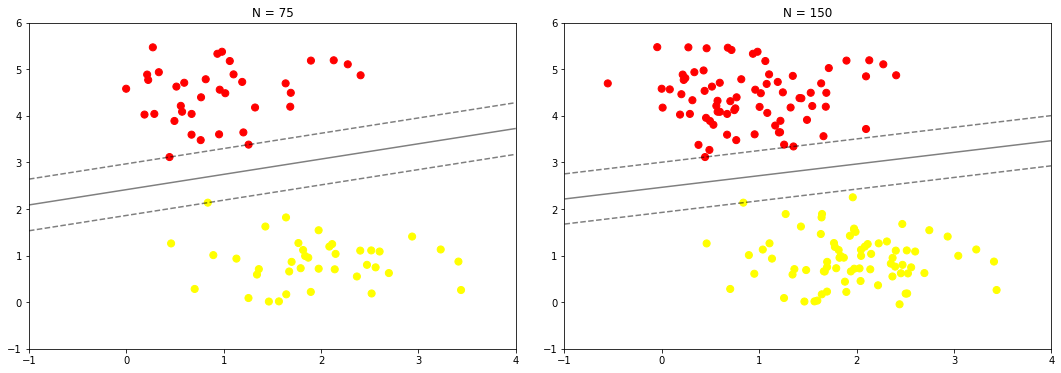

In [15]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [75, 150]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

Another method to look at this is through a live notebook where I can manually adjust the population of points. This is a neat way to quickly compare the support vectors.

In [16]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 300], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 300), value=10), Output()), _dom_classes=('widget…

## Beyond linear boundaries: Kernel SVM
Kernels are another way to create powerful support vector machines by being able to use a linear classifier to fit for nonlinear relationships. In this example, I can use a similiar idea as I'll look at a set of data that can not be seperated linearly.

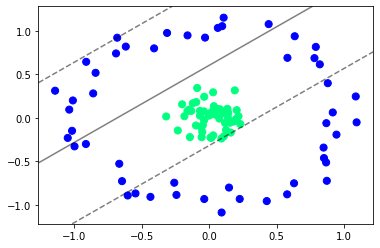

In [17]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(clf, plot_support=False);

Obviously there is no way to linearly seperate the two groups of data. One way that I can look at this is to compute a radial basis function that groups the set of data points in the center.

In [18]:
r = np.exp(-(X ** 2).sum(1))

In [19]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='winter')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-30, 30], azip=(-180, 180),
         X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', index=1, options=(-30, 30), value=30), IntSlider(value=30, …

This adds another way to look at the data by having an additional dimension of r. However, this is not the best method because I still had to manually solve for R. If I had not of centered the radial basis function accurately, I would not have had a nice visual to look at. To better seperate the data set is to change the kernel method from linear to radial basis function.

In [20]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

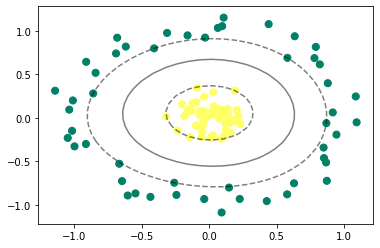

In [21]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

Just as before, I can fit the data and find the support vectors without me having to guess and check to find the best equation to fit the data. This method is much simpler and more accurate than trying to manually solve this.

## Tuning the SVM: Softening Margins
What happens when I don't have a clean data set? Having points that overlap each other where a line to seperate the data is not possible.

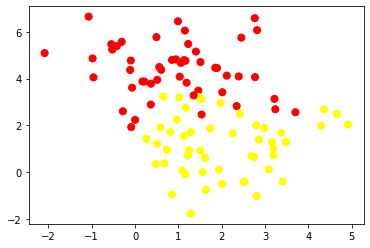

In [58]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Within support vector machines, there is a method that allows values to enter the margin to fit the data. This is controlled through the C value. A higher C value, the margin is high and not many points can be placed in it. If the C value is lower, the margin can widen and allow more points to lie within. The two plots below show the difference in margins based on the C values that I select.

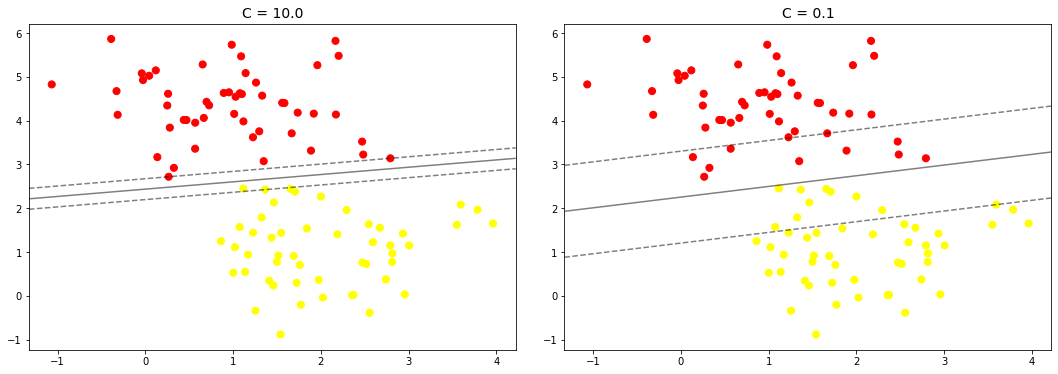

In [59]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

## Summary
In summary, support vector machine models are flexible to different types of data sets because of the different kernel methods that can be used. They are also only effected by support vectors, so they work well with large data sets or data sets with more dimensions than samples. However results for support vector machines can drastically change based on what parameters I select such as a C value. Support vector machines probably wouldn't be my first choice when analyzing a data set, but may be an alternative after I've tried other methods.

## Additional Questions

In your own words, describe the concepts of bias, variance, and overfitting and how how they could be used to evaluate models we build in this class.

Bias is how far are the predicted values from the actual values. Variance is how scattered the predicted values are from the actual data. Overfitting occurs when high variance is present. This means that the model follows the training data too well and is too closely fit. The goal when evaluating models is to have low bias and low variance in a data set. This reduces our risk or having overfitting and underfitting.